In [1]:
import os
os.chdir('..')

import pickle
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt

import glob

In [2]:
label_size = 20
tick_size = 16
title_size = 24
subtitle_size = 24
caption_size = 24
line_width = 4
legend_size = 20
markersize=12


fig_width = 8
fig_height = 4
x_label = [50, 20, 5, 2.5, 1.4, 0.5]
x_lim = [0.48, 55.0]
y_label_af = [i*10 for i in range(5,10)]
y_lim_af = [48, 95]
y_label_bf = [i*20-10 for i in range(1,6)]
y_lim_bf = [8, 95]


In [3]:
colors = ['#073B4C', '#FFD166', '#EF476F', '#06D6A0',  '#118AB2', '#4D4C7D', '#FFDAC0', '#F54952']
colors1 = ['#073B4C','#242F9B','#646FD4','#9BA3EB',] 
colors2 = ['#49006a','#7a0177','#ae017e','#dd3497',] # red-purple
colors3 = ['#FB6F92','#FF8FAB','#FFB3C6','#FFC2D1','#FFE5EC',]
colors4 = ['#52b69a', '#76c893','#99d98c','#b5e48c','#d9ed92',]
colors5 = ['#184E77','#1E6091','#1A759F','#168AAD','#34A0A4',]
colors6 = ['#582F0E', '#7F4F24', '#936639', '#A68A64', '#B6AD90']
colors7 = ['#333D29', '#414833', '#656D4A', '#A4AC86', '#C2C5AA']

#'#FFD166', '#EF476F', '#06D6A0',  '#118AB2', '#4D4C7D', '#FFDAC0', '#F54952'
warm_colors= ['#C2E4FF', '#2a2a72', '#009ffd', '#ffa400']
cold_colors = ['#DBDFFD', '#9BA3EB', '#646FD4', '#242F9B']

color_map = {
    # "Nope": colors6[0],
    "Nope, decode2": colors6[1],
    # "Rope": colors7[0],
    "Rope, decode2": colors7[1],
    "Backtrack p=0.5, decode2": colors2[0],
    # "Backtrack p=0.5, decode": colors2[1],
    # "Backtrack p=0.5, no decode": colors2[2],
    "Backtrack Mask p=0.5, decode2": colors3[0],
    # "Backtrack Mask p=0.5, decode": colors3[1],
    # "Backtrack Mask p=0.5, no decode": colors3[2],
    "Backtrack p=0.2, decode2": colors4[0],
    # "Backtrack p=0.2, decode": colors4[1],
    # "Backtrack p=0.2, no decode": colors4[2],
    "Backtrack Mask p=0.2, decode2": colors5[0],
    # "Backtrack Mask p=0.2, decode": colors5[1],
    # "Backtrack Mask p=0.2, no decode": colors5[2],
}

label_list = [
    # "Nope",
    "Nope, decode2",
    # "Rope",
    "Rope, decode2",
    "Backtrack p=0.5, decode2",
    # "Backtrack p=0.5, decode",
    # "Backtrack p=0.5, no decode",
    "Backtrack Mask p=0.5, decode2",
    # "Backtrack Mask p=0.5, decode",
    # "Backtrack Mask p=0.5, no decode",
    "Backtrack p=0.2, decode2",
    # "Backtrack p=0.2, decode",
    # "Backtrack p=0.2, no decode",
    "Backtrack Mask p=0.2, decode2",
    # "Backtrack Mask p=0.2, decode",
    # "Backtrack Mask p=0.2, no decode",
]

In [4]:
num_train_list = [5000, 10000, 50000, 100000, 500000, 1000000, 5000000, 10000000]

In [5]:
reverse_nope_list = []
reverse_rope_list = []
backtrack_p02_list = []
backtrack_p05_list = []
backtrack_mask_p02_list = []
backtrack_mask_p05_list = []

for num_train in num_train_list:
    reverse_nope_list.append(f"out/reverse_{num_train}-llama-384-6-6-1024-reverse-digits-1_17_-seed-43")
    reverse_rope_list.append(f"out/reverse_{num_train}-llama-384-6-6-1024-rope-reverse-digits-1_17_-seed-43")
    backtrack_p02_list.append(f"out/backtrack_{num_train}_p02-llama-384-6-6-1024-backtrack-digits-1_17_-seed-43")
    backtrack_p05_list.append(f"out/backtrack_{num_train}_p05-llama-384-6-6-1024-backtrack-digits-1_17_-seed-43")
    backtrack_mask_p02_list.append(f"out/backtrack_mask_{num_train}_p02-llama-384-6-6-1024-backtrack-digits-1_17_-seed-43")
    backtrack_mask_p05_list.append(f"out/backtrack_mask_{num_train}_p05-llama-384-6-6-1024-backtrack-digits-1_17_-seed-43")

In [10]:
# def process_digit_accuracies(file_path, dict_name):
#     if not os.path.exists(file_path):
#         print(f"{file_path} does not exist")
#         return
    
#     df = pd.read_csv(file_path)
#     for num_digit in range(1, 33):
#         if num_digit not in dict_name:
#             dict_name[num_digit] = []
#         dict_name[num_digit].append(df[f'{num_digit}_digit_acc'].values[-1])


metrics = ['first_wrong_loc', 'backtrack_count', 'first_backtrack_loc']
def process_digit_others(file_path, dict_name, metrics=metrics):
    if not os.path.exists(file_path):
        print(f"{file_path} does not exist")
        return
    
    df = pd.read_csv(file_path)
    for num_digit in range(1, 33):
        for metric in metrics:
            if metric not in dict_name:
                dict_name[metric] = {}
            if num_digit not in dict_name[metric]:
                dict_name[metric][num_digit] = []
            dict_name[metric][num_digit].append(df[f'{num_digit}_digit_avg_{metric}'].values[-1])

        if 'acc' not in dict_name:
            dict_name['acc'] = {}
        if num_digit not in dict_name['acc']:
            dict_name['acc'][num_digit] = []
        dict_name['acc'][num_digit].append(df[f'{num_digit}_digit_acc'].values[-1])




# Dictionary initialization
# reverse_nope_dict = {}
# reverse_rope_dict = {}
reverse_nope_btdec2_dict = {}
reverse_rope_btdec2_dict = {}

# Separate dictionaries for each case
# backtrack_p05_btdec_dict = {}
backtrack_p05_btdec2_dict = {}
# backtrack_p05_no_btdec_dict = {}
# backtrack_mask_p05_btdec_dict = {}
backtrack_mask_p05_btdec2_dict = {}
# backtrack_mask_p05_no_btdec_dict = {}

# backtrack_p02_btdec_dict = {}
backtrack_p02_btdec2_dict = {}
# backtrack_p02_no_btdec_dict = {}
# backtrack_mask_p02_btdec_dict = {}
backtrack_mask_p02_btdec2_dict = {}
# backtrack_mask_p02_no_btdec_dict = {}

# Loop through the files and process data
for i, num_train in enumerate(num_train_list):
    # Reverse nope and rope processing
    # process_digit_accuracies(f"{reverse_nope_list[i]}/result.csv", reverse_nope_dict)
    # process_digit_accuracies(f"{reverse_rope_list[i]}/result.csv", reverse_rope_dict)
    process_digit_others(f"{reverse_nope_list[i]}/backtrack_decode2_new.csv", reverse_nope_btdec2_dict)
    process_digit_others(f"{reverse_rope_list[i]}/backtrack_decode2_new.csv", reverse_rope_btdec2_dict)

    # Backtrack processing for p05
    # process_digit_accuracies(f"{backtrack_p05_list[i]}/backtrack_decode.csv", backtrack_p05_btdec_dict)
    process_digit_others(f"{backtrack_p05_list[i]}/backtrack_decode2_new.csv", backtrack_p05_btdec2_dict)
    # process_digit_accuracies(f"{backtrack_p05_list[i]}/backtrack_no_decode.csv", backtrack_p05_no_btdec_dict)

    # process_digit_accuracies(f"{backtrack_mask_p05_list[i]}/backtrack_decode.csv", backtrack_mask_p05_btdec_dict)
    process_digit_others(f"{backtrack_mask_p05_list[i]}/backtrack_decode2_new.csv", backtrack_mask_p05_btdec2_dict)
    # process_digit_accuracies(f"{backtrack_mask_p05_list[i]}/backtrack_no_decode.csv", backtrack_mask_p05_no_btdec_dict)

    # Backtrack processing for p02
    # process_digit_accuracies(f"{backtrack_p02_list[i]}/backtrack_decode.csv", backtrack_p02_btdec_dict)
    process_digit_others(f"{backtrack_p02_list[i]}/backtrack_decode2_new.csv", backtrack_p02_btdec2_dict)
    # process_digit_accuracies(f"{backtrack_p02_list[i]}/backtrack_no_decode.csv", backtrack_p02_no_btdec_dict)

    # process_digit_accuracies(f"{backtrack_mask_p02_list[i]}/backtrack_decode.csv", backtrack_mask_p02_btdec_dict)
    process_digit_others(f"{backtrack_mask_p02_list[i]}/backtrack_decode2_new.csv", backtrack_mask_p02_btdec2_dict)
    # process_digit_accuracies(f"{backtrack_mask_p02_list[i]}/backtrack_no_decode.csv", backtrack_mask_p02_no_btdec_dict)

# Print results
# print('reverse_nope_dict', reverse_nope_dict)
# print('reverse_rope_dict', reverse_rope_dict)
print('reverse_nope_btdec2_dict', reverse_nope_btdec2_dict)
print('reverse_rope_btdec2_dict', reverse_rope_btdec2_dict)
# print('backtrack_p05_btdec_dict', backtrack_p05_btdec_dict)
print('backtrack_p05_btdec2_dict', backtrack_p05_btdec2_dict)
# print('backtrack_p05_no_btdec_dict', backtrack_p05_no_btdec_dict)
# print('backtrack_mask_p05_btdec_dict', backtrack_mask_p05_btdec_dict)
print('backtrack_mask_p05_btdec2_dict', backtrack_mask_p05_btdec2_dict)
# print('backtrack_mask_p05_no_btdec_dict', backtrack_mask_p05_no_btdec_dict)
# print('backtrack_p02_btdec_dict', backtrack_p02_btdec_dict)
print('backtrack_p02_btdec2_dict', backtrack_p02_btdec2_dict)
# print('backtrack_p02_no_btdec_dict', backtrack_p02_no_btdec_dict)
# print('backtrack_mask_p02_btdec_dict', backtrack_mask_p02_btdec_dict)
print('backtrack_mask_p02_btdec2_dict', backtrack_mask_p02_btdec2_dict)
# print('backtrack_mask_p02_no_btdec_dict', backtrack_mask_p02_no_btdec_dict)


out/reverse_5000-llama-384-6-6-1024-rope-reverse-digits-1_17_-seed-43/backtrack_decode2_new.csv does not exist
out/reverse_10000-llama-384-6-6-1024-rope-reverse-digits-1_17_-seed-43/backtrack_decode2_new.csv does not exist
out/reverse_50000-llama-384-6-6-1024-rope-reverse-digits-1_17_-seed-43/backtrack_decode2_new.csv does not exist
out/reverse_100000-llama-384-6-6-1024-rope-reverse-digits-1_17_-seed-43/backtrack_decode2_new.csv does not exist
out/reverse_500000-llama-384-6-6-1024-rope-reverse-digits-1_17_-seed-43/backtrack_decode2_new.csv does not exist
out/reverse_1000000-llama-384-6-6-1024-rope-reverse-digits-1_17_-seed-43/backtrack_decode2_new.csv does not exist
out/reverse_5000000-llama-384-6-6-1024-rope-reverse-digits-1_17_-seed-43/backtrack_decode2_new.csv does not exist
out/reverse_10000000-llama-384-6-6-1024-rope-reverse-digits-1_17_-seed-43/backtrack_decode2_new.csv does not exist
reverse_nope_btdec2_dict {'first_wrong_loc': {1: [2.484641638225256, 2.7852998065764023, 2.0, na

In [12]:
result_dict = {
    # "Nope": reverse_nope_dict,
    # "Rope": reverse_rope_dict,
    "Nope, decode2": reverse_nope_btdec2_dict,
    # "Rope, decode2": reverse_rope_btdec2_dict,
    "Backtrack p=0.5, decode2": backtrack_p05_btdec2_dict,
    # "Backtrack p=0.5, decode": backtrack_p05_btdec_dict,
    # "Backtrack p=0.5, no decode": backtrack_p05_no_btdec_dict,
    "Backtrack Mask p=0.5, decode2": backtrack_mask_p05_btdec2_dict,
    # "Backtrack Mask p=0.5, decode": backtrack_mask_p05_btdec_dict,
    # "Backtrack Mask p=0.5, no decode": backtrack_mask_p05_no_btdec_dict,
    "Backtrack p=0.2, decode2": backtrack_p02_btdec2_dict,
    # "Backtrack p=0.2, decode": backtrack_p02_btdec_dict,
    # "Backtrack p=0.2, no decode": backtrack_p02_no_btdec_dict,
    "Backtrack Mask p=0.2, decode2": backtrack_mask_p02_btdec2_dict,
    # "Backtrack Mask p=0.2, decode": backtrack_mask_p02_btdec_dict,
    # "Backtrack Mask p=0.2, no decode": backtrack_mask_p02_no_btdec_dict,
}

label_list = [
    "Nope, decode2",
    "Backtrack p=0.5, decode2",
    "Backtrack Mask p=0.5, decode2",
    "Backtrack p=0.2, decode2",
    "Backtrack Mask p=0.2, decode2",
]

# Analyze other properties

In [29]:
# metrics = ['first_wrong_loc', 'backtrack_count', 'first_backtrack_loc']

# # 1_digit_avg_first_wrong_loc,1_digit_avg_backtrack_count,1_digit_avg_first_backtrack_loc,
# def process_digit_others(file_path, dict_name, metrics):
#     if not os.path.exists(file_path):
#         print(f"{file_path} does not exist")
#         return
    
#     df = pd.read_csv(file_path)
#     for num_digit in range(1, 33):
#         for metric in metrics:
#             if metric not in dict_name:
#                 dict_name[metric] = {}
#             if num_digit not in dict_name[metric]:
#                 dict_name[metric][num_digit] = []
#             dict_name[metric][num_digit].append(df[f'{num_digit}_digit_avg_{metric}'].values[-1])

#         if 'acc' not in dict_name:
#             dict_name['acc'] = {}
#         if num_digit not in dict_name['acc']:
#             dict_name['acc'][num_digit] = []
#         dict_name['acc'][num_digit].append(df[f'{num_digit}_digit_acc'].values[-1])


# # Separate dictionaries for each case
# backtrack_p05_btdec2_dict2 = {}
# backtrack_mask_p05_btdec2_dict2 = {}
# backtrack_p02_btdec2_dict2 = {}
# backtrack_mask_p02_btdec2_dict2 = {}


# # Loop through the files and process data
# for i, num_train in enumerate(num_train_list):
#     # Reverse nope and rope processing
#     process_digit_others(f"{backtrack_p05_list[i]}/backtrack_decode2_new.csv", backtrack_p05_btdec2_dict2, metrics)
#     process_digit_others(f"{backtrack_mask_p05_list[i]}/backtrack_decode2_new.csv", backtrack_mask_p05_btdec2_dict2, metrics)
#     process_digit_others(f"{backtrack_p02_list[i]}/backtrack_decode2_new.csv", backtrack_p02_btdec2_dict2, metrics)
#     process_digit_others(f"{backtrack_mask_p02_list[i]}/backtrack_decode2_new.csv", backtrack_mask_p02_btdec2_dict2, metrics)

# # Print results
# print('backtrack_p05_btdec2_dict2', backtrack_p05_btdec2_dict2)
# print('backtrack_mask_p05_btdec2_dict2', backtrack_mask_p05_btdec2_dict2)
# print('backtrack_p02_btdec2_dict2', backtrack_p02_btdec2_dict2)
# print('backtrack_mask_p02_btdec2_dict2', backtrack_mask_p02_btdec2_dict2)

# result_dict2 = {
#     "Backtrack p=0.5, decode2": backtrack_p05_btdec2_dict2,
#     "Backtrack Mask p=0.5, decode2": backtrack_mask_p05_btdec2_dict2,
#     "Backtrack p=0.2, decode2": backtrack_p02_btdec2_dict2,
#     "Backtrack Mask p=0.2, decode2": backtrack_mask_p02_btdec2_dict2,
# }

# label_list2 = [
#     "Backtrack p=0.5, decode2",
#     "Backtrack Mask p=0.5, decode2",
#     "Backtrack p=0.2, decode2",
#     "Backtrack Mask p=0.2, decode2",
# ]

backtrack_p05_btdec2_dict2 {'first_wrong_loc': {1: [1.6435643564356437, 1.7857142857142858, 2.645833333333333, 2.4827586206896552, nan, nan, nan, nan], 2: [3.0, 2.397959183673469, 3.279352226720648, 3.09493670886076, nan, nan, nan, nan], 3: [3.60077519379845, 3.0517857142857143, 4.265193370165746, 3.9948453608247423, 5.0, nan, nan, nan], 4: [4.5, 3.929032258064516, 5.118721461187215, 4.857142857142857, nan, nan, nan, nan], 5: [5.094086021505376, 4.603945371775417, 6.102822580645161, 5.879003558718861, nan, nan, nan, nan], 6: [5.951945080091533, 5.497822931785196, 6.848076923076923, 6.63855421686747, nan, nan, nan, nan], 7: [6.698689956331878, 6.272984441301273, 7.66383701188455, 7.637931034482759, 9.0, nan, nan, nan], 8: [7.422680412371134, 6.975609756097561, 8.634228187919463, 8.415162454873647, nan, nan, nan, nan], 9: [8.009487666034156, 7.735142118863049, 9.531107738998482, 9.276094276094277, nan, nan, nan, nan], 10: [8.778947368421052, 8.177722152690864, 10.506293706293706, 9.93416

In [13]:
def plot_metrics(num_digit, metrics=metrics, method_list=label_list): 

    plt.figure(figsize=(len(metrics) * fig_width, fig_height * 3/2))
    # plot numtiple figures
    for i, metric in enumerate(metrics):
        plt.subplot(1, len(metrics), i+1)
        for method in method_list:
            key = method
            value = result_dict[method][metric][num_digit]

            plt.plot(num_train_list, value, color=color_map[key], label=f'{key}', marker='o', markersize=markersize, linewidth=line_width)

        plt.xlabel('# of train samples', fontsize=label_size)
        plt.ylabel(f'average {metric}'.replace('_', ' '), fontsize=label_size)
        plt.xticks(fontsize=tick_size)
        plt.yticks(fontsize=tick_size)
        plt.xscale('log')

        if metric == 'backtrack_count':
            plt.ylim([0, 320])
        elif metric == 'first_backtrack_loc':
            plt.ylim([0, 20])

        plt.grid(color='grey', linestyle='-', linewidth=0.5, alpha=0.5)
        # plt.title(f'average {metric}'.replace('_', ' '), fontsize=title_size)
    
    plt.legend(fontsize=16, loc='center left', bbox_to_anchor=(1, 0.5))
    
    # title for the whole figure
    plt.suptitle(f'{num_digit} digit', fontsize=title_size+2)#, y=1.05)


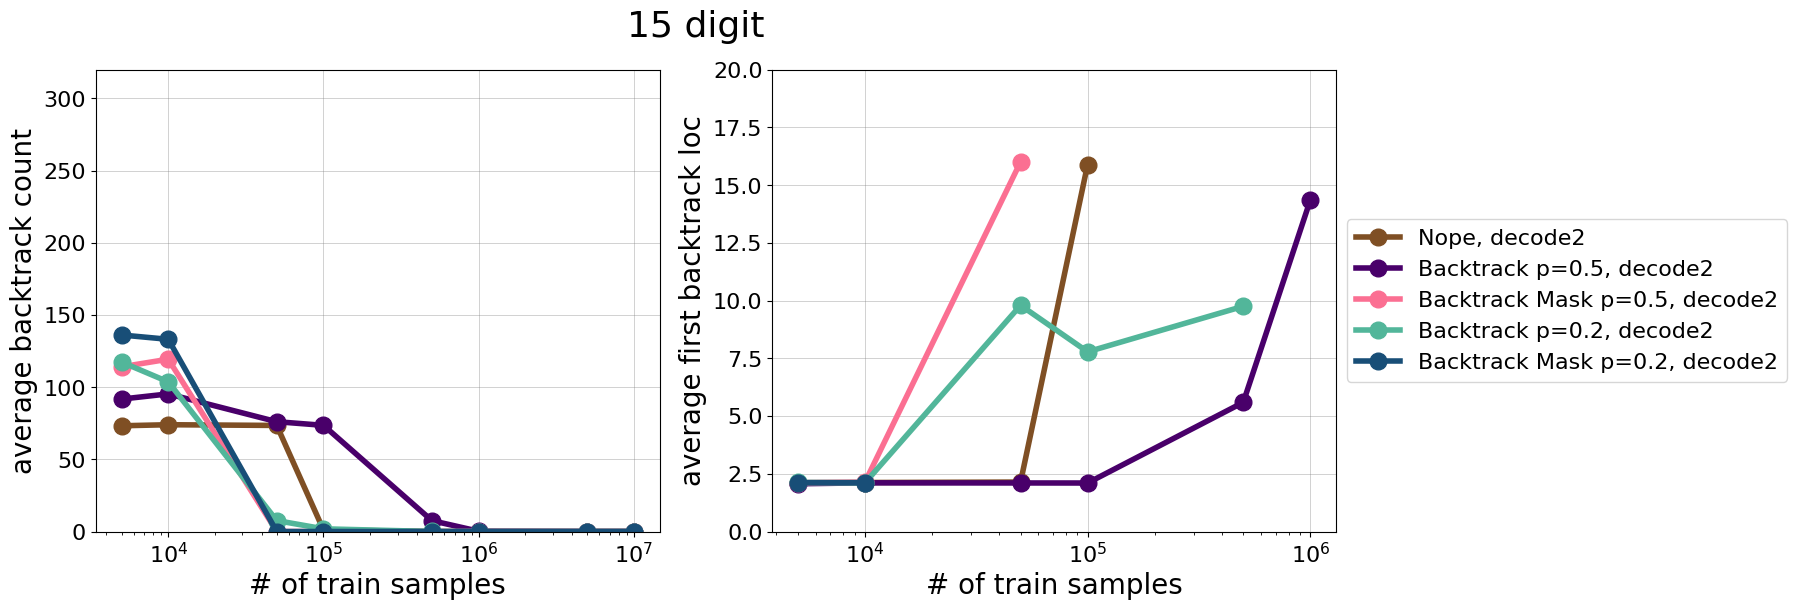

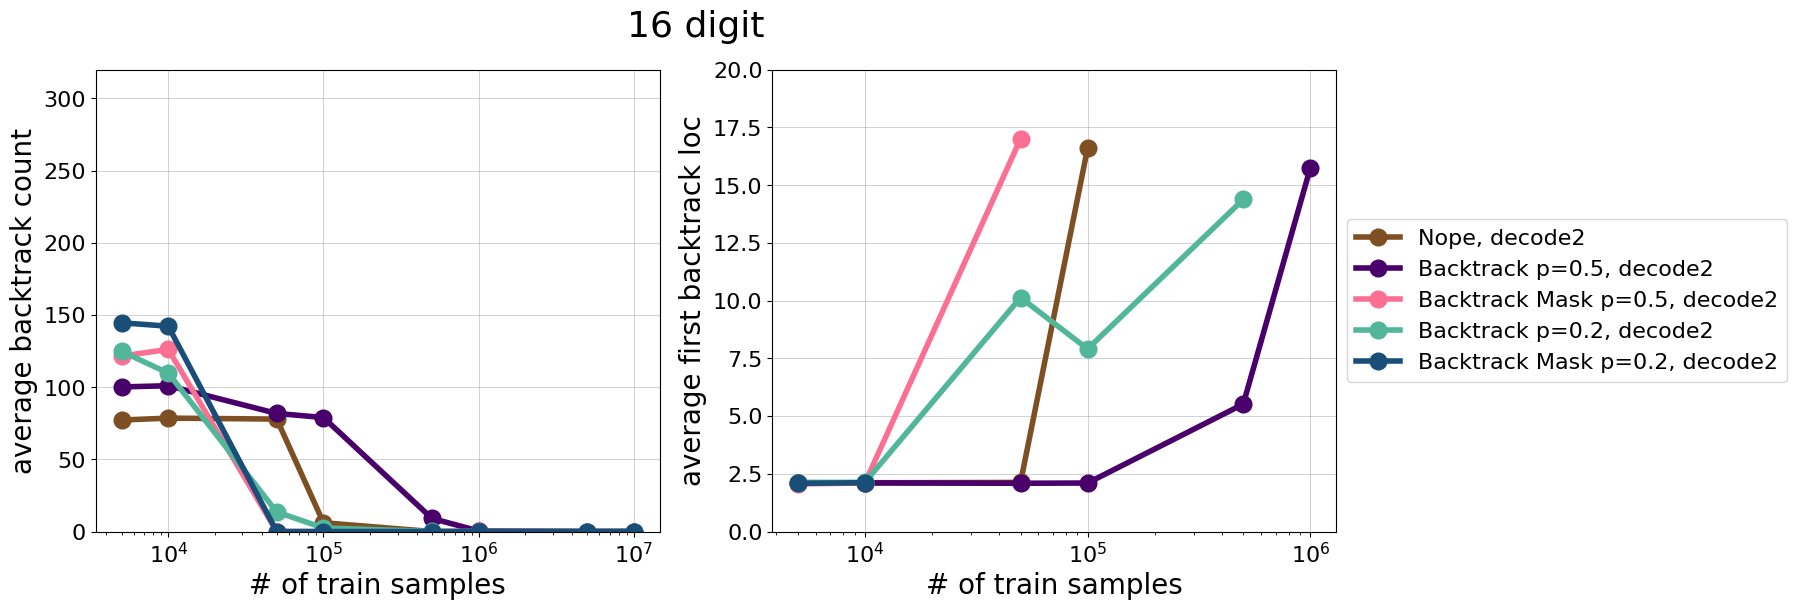

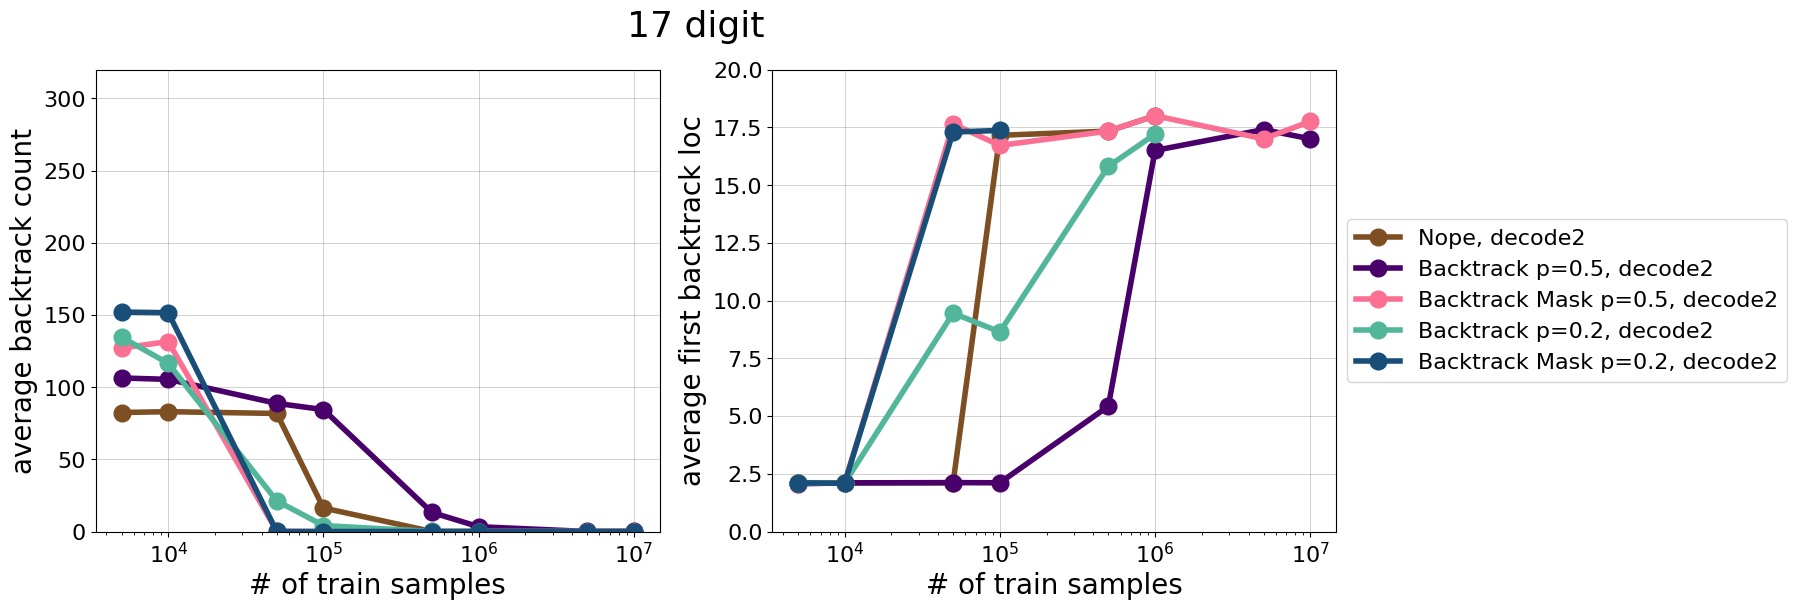

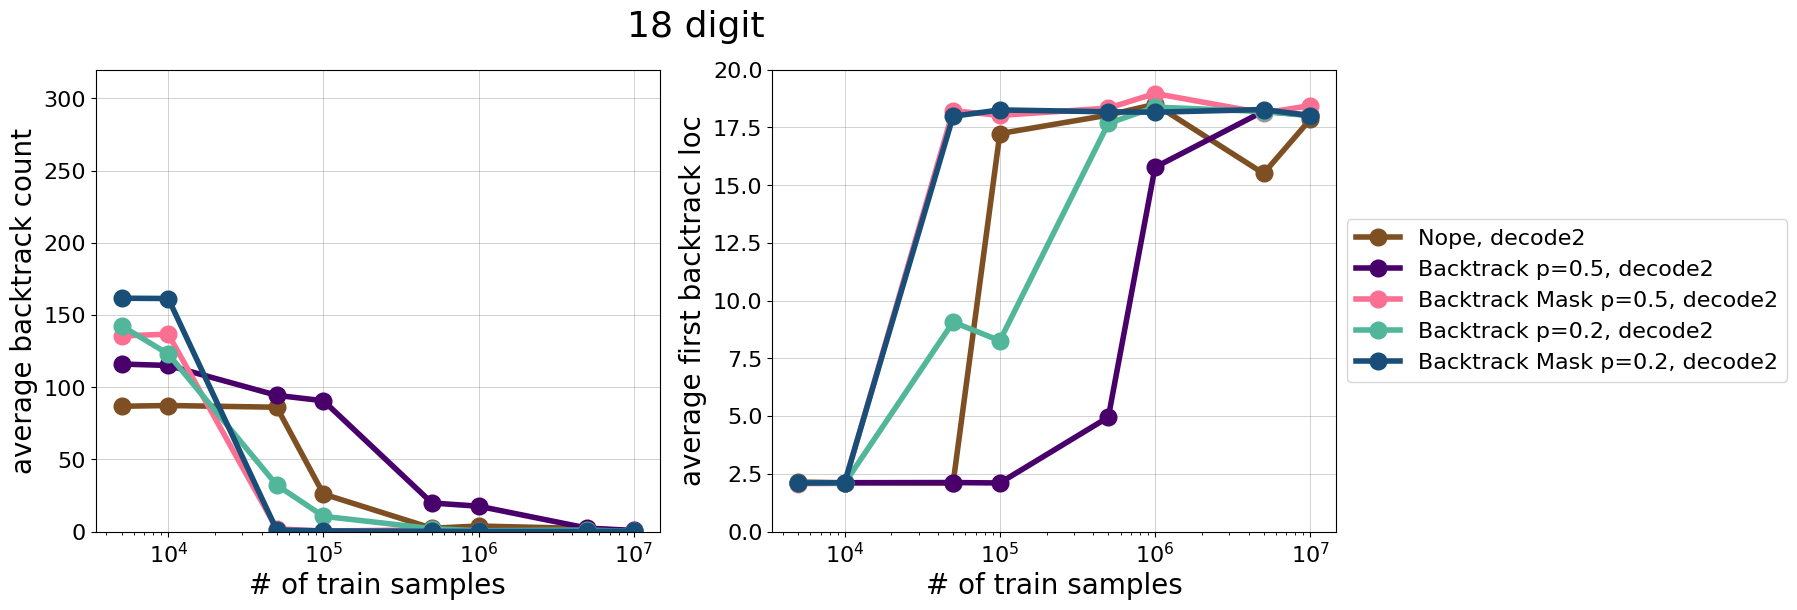

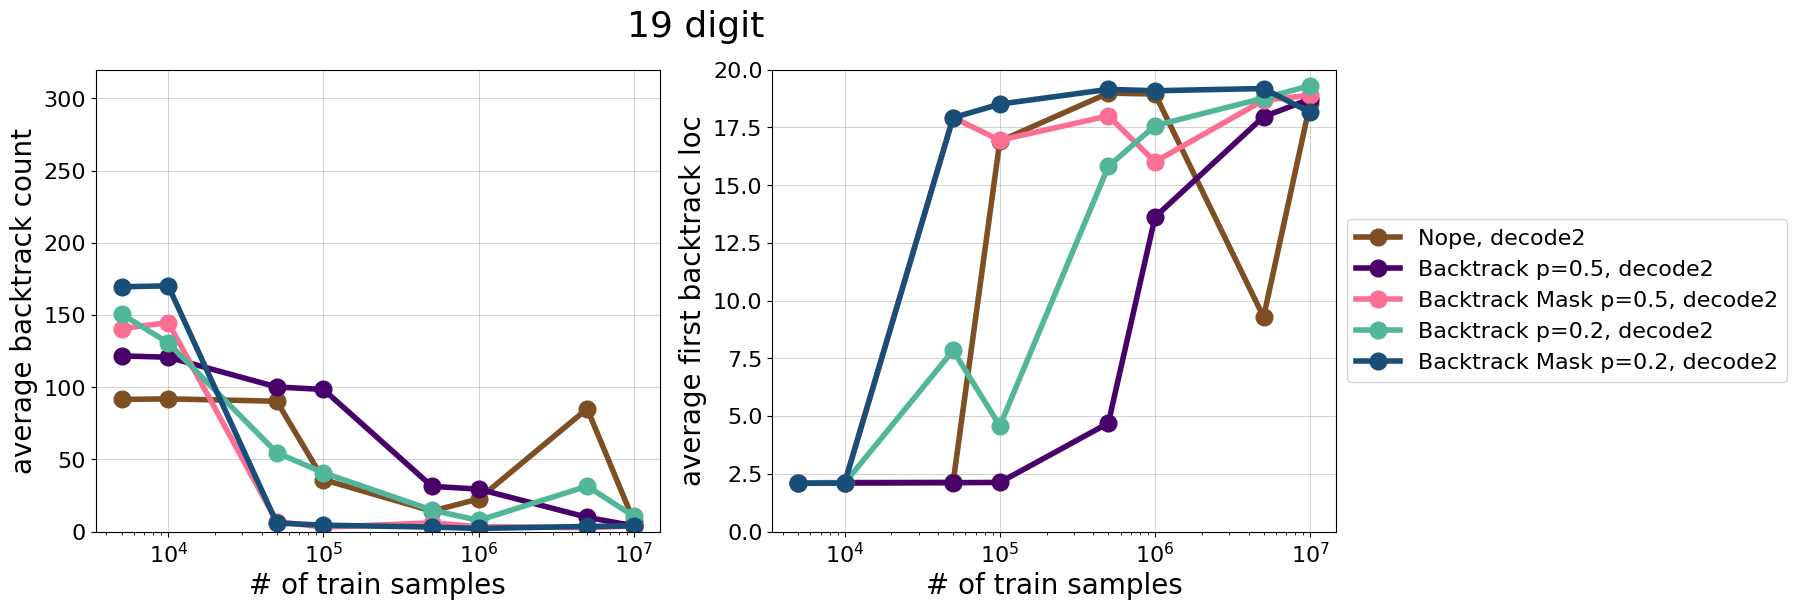

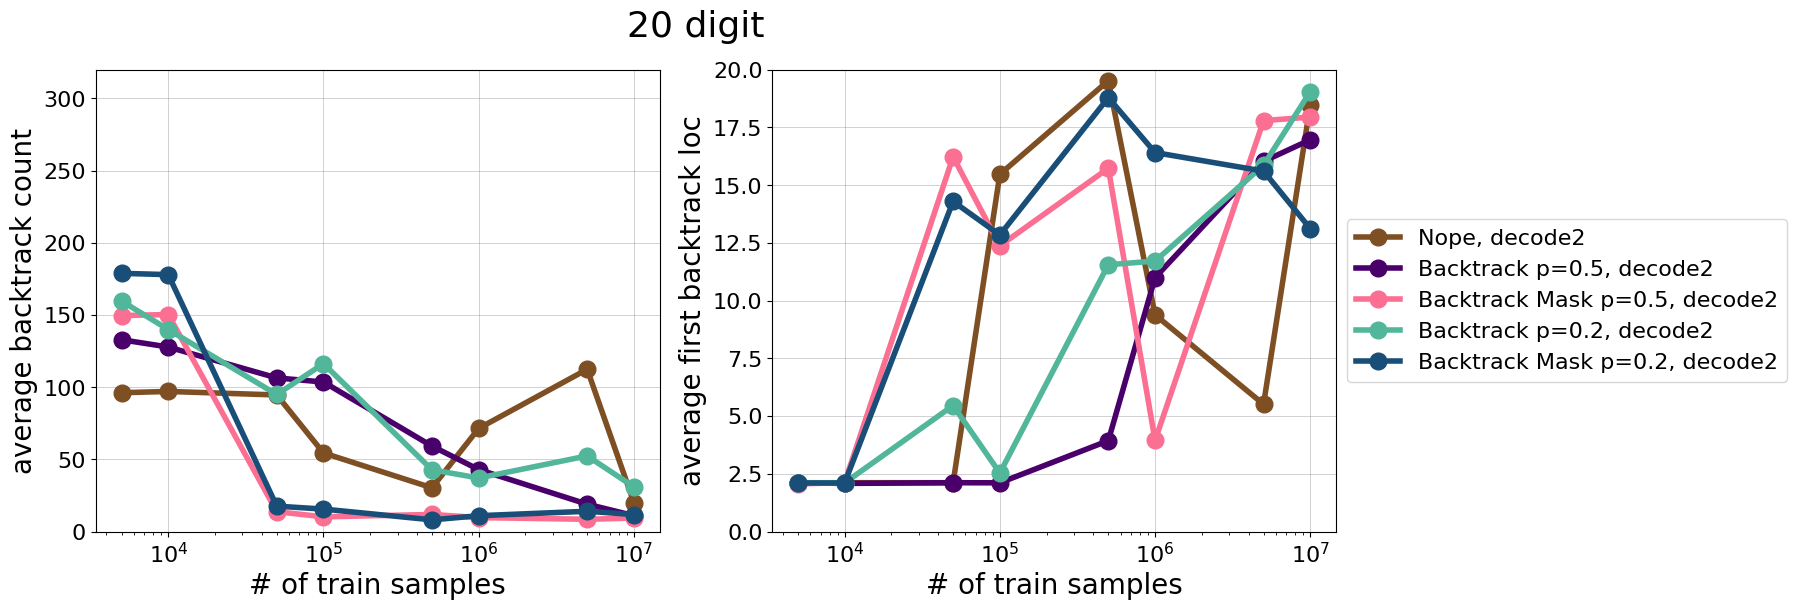

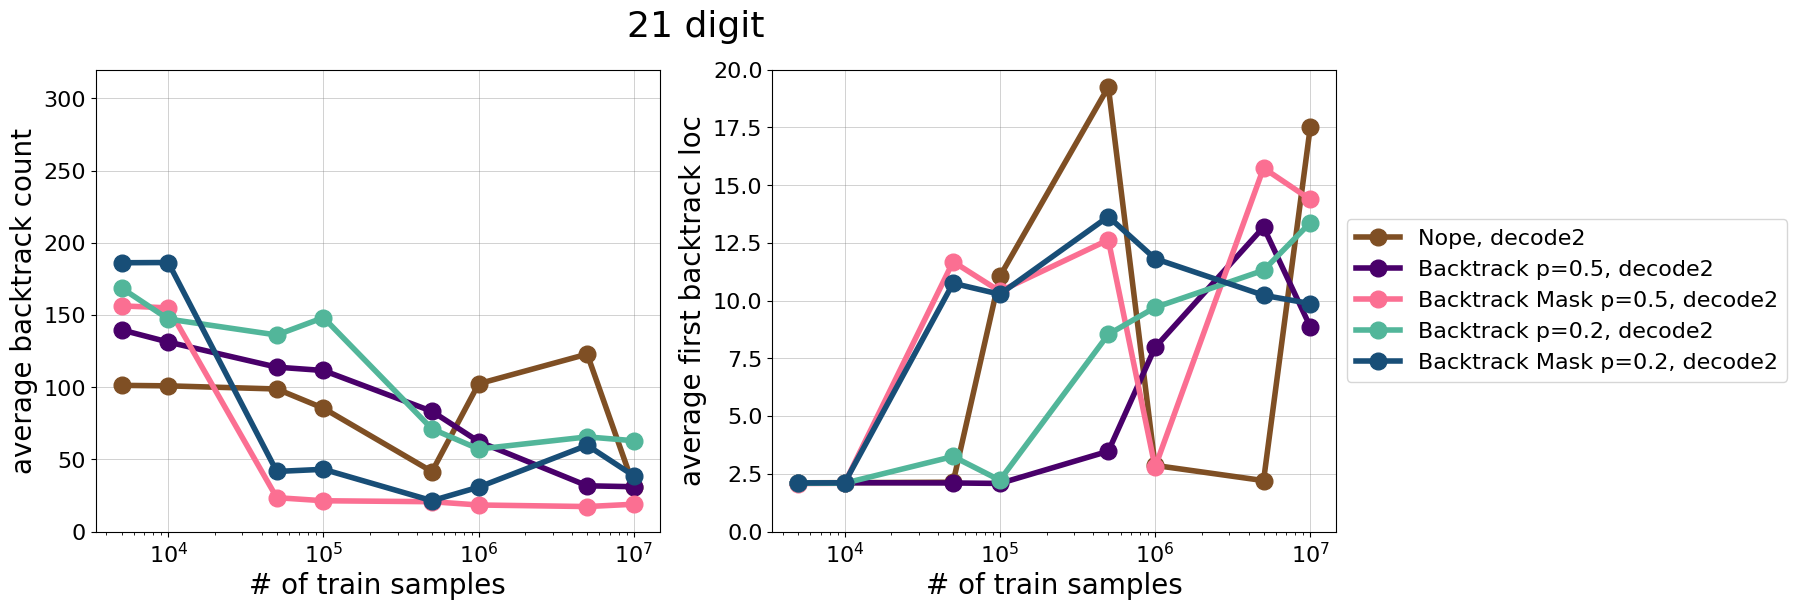

In [14]:
metrics = ['backtrack_count', 'first_backtrack_loc']
plot_metrics(15, metrics)
plot_metrics(16, metrics)
plot_metrics(17, metrics)
plot_metrics(18, metrics)
plot_metrics(19, metrics)
plot_metrics(20, metrics)
plot_metrics(21, metrics)

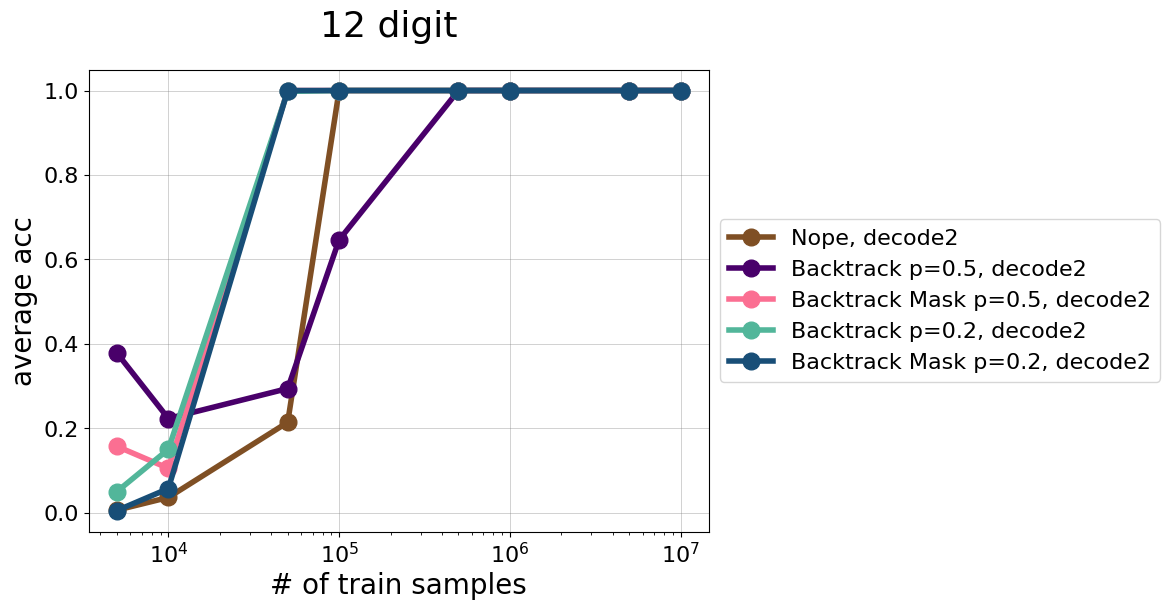

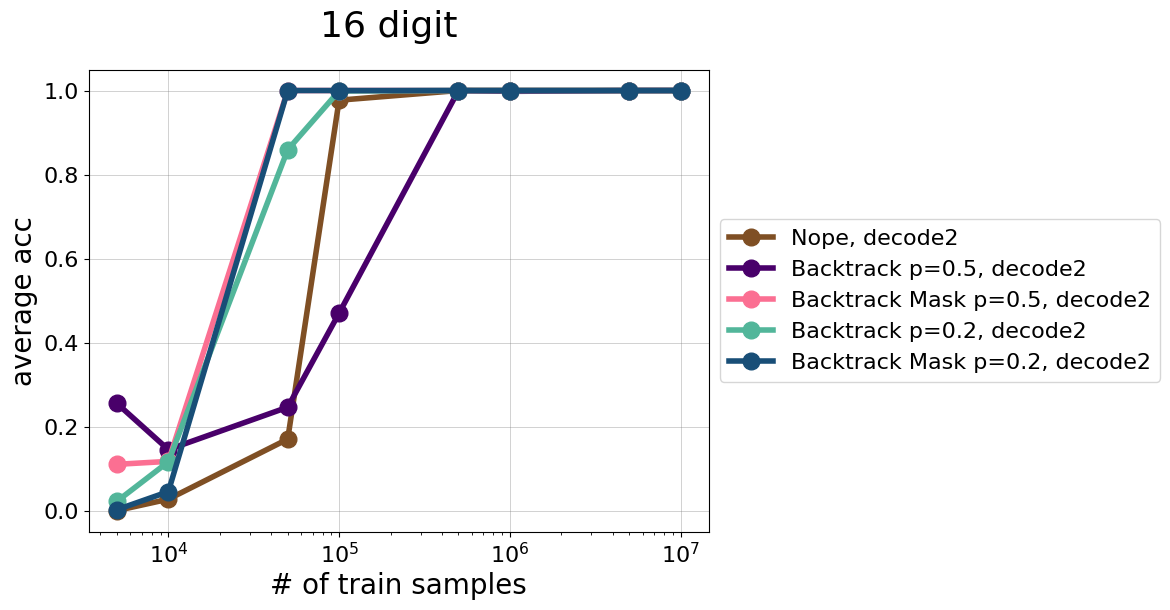

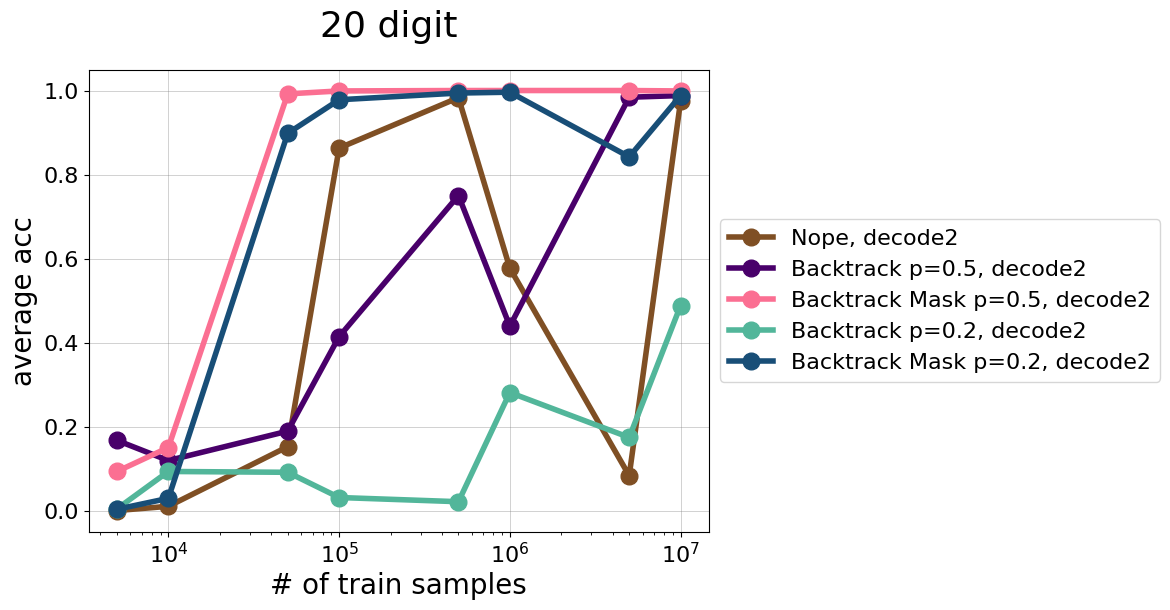

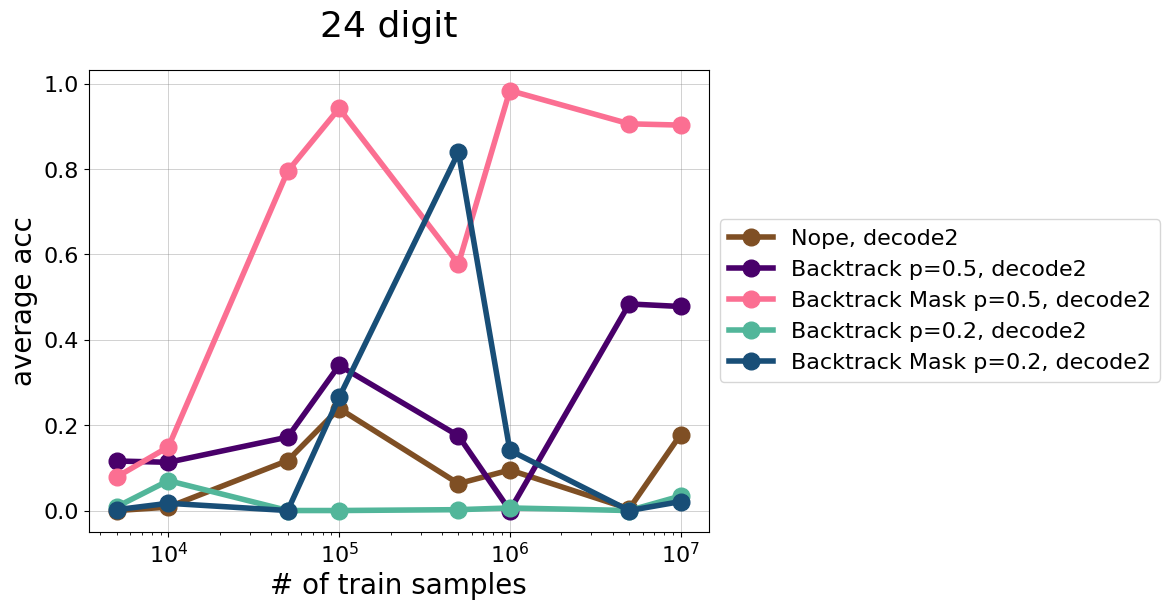

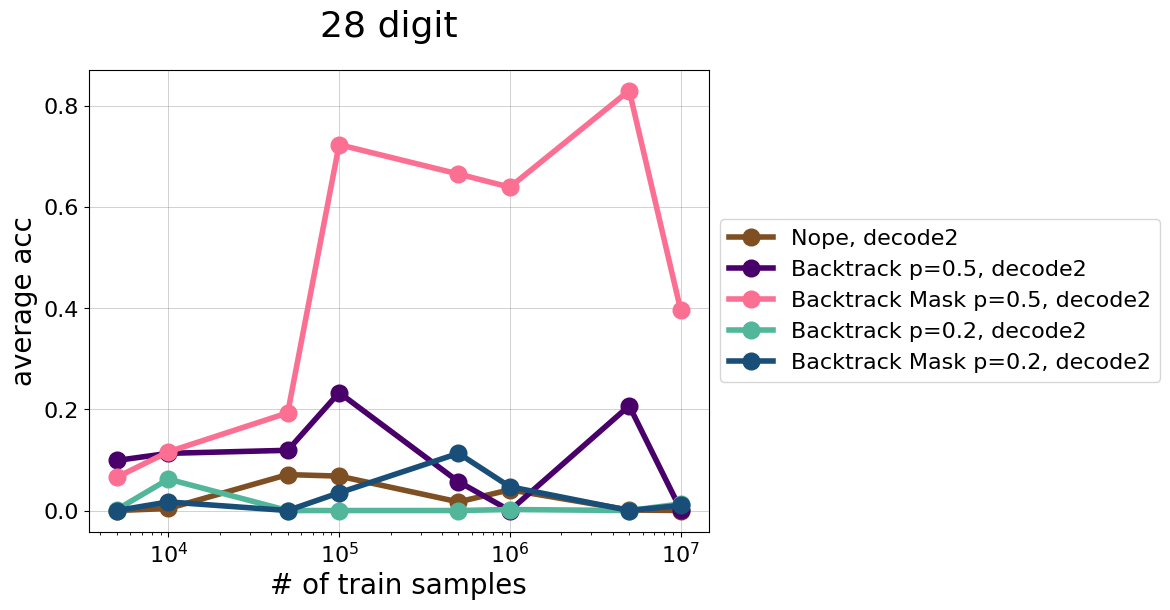

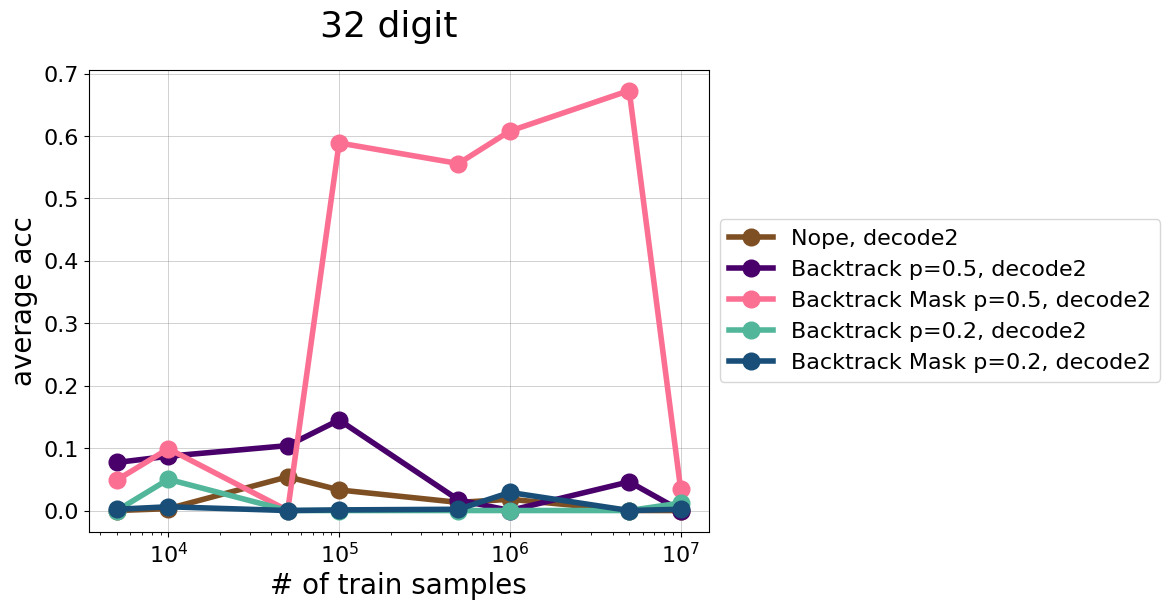

In [20]:
metrics = ['acc']
plot_metrics(12, metrics)
plot_metrics(16, metrics)
plot_metrics(20, metrics)
plot_metrics(24, metrics)
plot_metrics(28, metrics)
plot_metrics(32, metrics)

In [15]:
def plot_length_gen_metric(num_train=10000000, metrics=metrics, method_list=label_list, x_lim=[0, 32]): 

    j = num_train_list.index(num_train)
    num_digit_list = [i for i in range(1,33)]
    
    plt.figure(figsize=(len(metrics) * fig_width, fig_height * 3/2))
    
    for i, metric in enumerate(metrics):
        plt.subplot(1, len(metrics), i+1)
        for method in method_list:
            key = method
            num_digit_acc = [result_dict[method][metric][num_digit][j] for num_digit in range(1, 33)]
            plt.plot(num_digit_list, num_digit_acc, color=color_map[key], label=f'{key}', marker='o', markersize=markersize, linewidth=line_width)

        plt.axvline(x=16, color='r', linestyle='--', linewidth=line_width)
        plt.xlabel('# of digits', fontsize=label_size)
        plt.ylabel(f'average {metric}'.replace('_', ' '), fontsize=label_size)
        plt.xticks(fontsize=tick_size)
        plt.yticks(fontsize=tick_size)
        plt.xlim(x_lim)

        if metric == 'backtrack_count':
            plt.ylim([0, 320])
            x = np.linspace(1, 32, 100)
            y = 5 * x
            plt.plot(x, y, 'k--', linewidth=line_width/2)
            plt.text(3, 30, 'y=5x (random guess)', fontsize=16, color='k', rotation=20)
        elif metric == 'first_backtrack_loc':
            plt.ylim([0, 20])
            x = np.linspace(1, 32, 100)
            y =  x
            plt.plot(x, y, 'k--', linewidth=line_width/2)
            plt.text(5, 7.5, 'y=x', fontsize=16, color='k', rotation=45)

        plt.grid(color='grey', linestyle='-', linewidth=0.5, alpha=0.5)
        # plt.title(f'average {metric}'.replace('_', ' '), fontsize=title_size)

    plt.legend(fontsize=16, loc='center left', bbox_to_anchor=(1, 0.5))
    plt.suptitle(f'num train = {num_train}', fontsize=title_size+2)


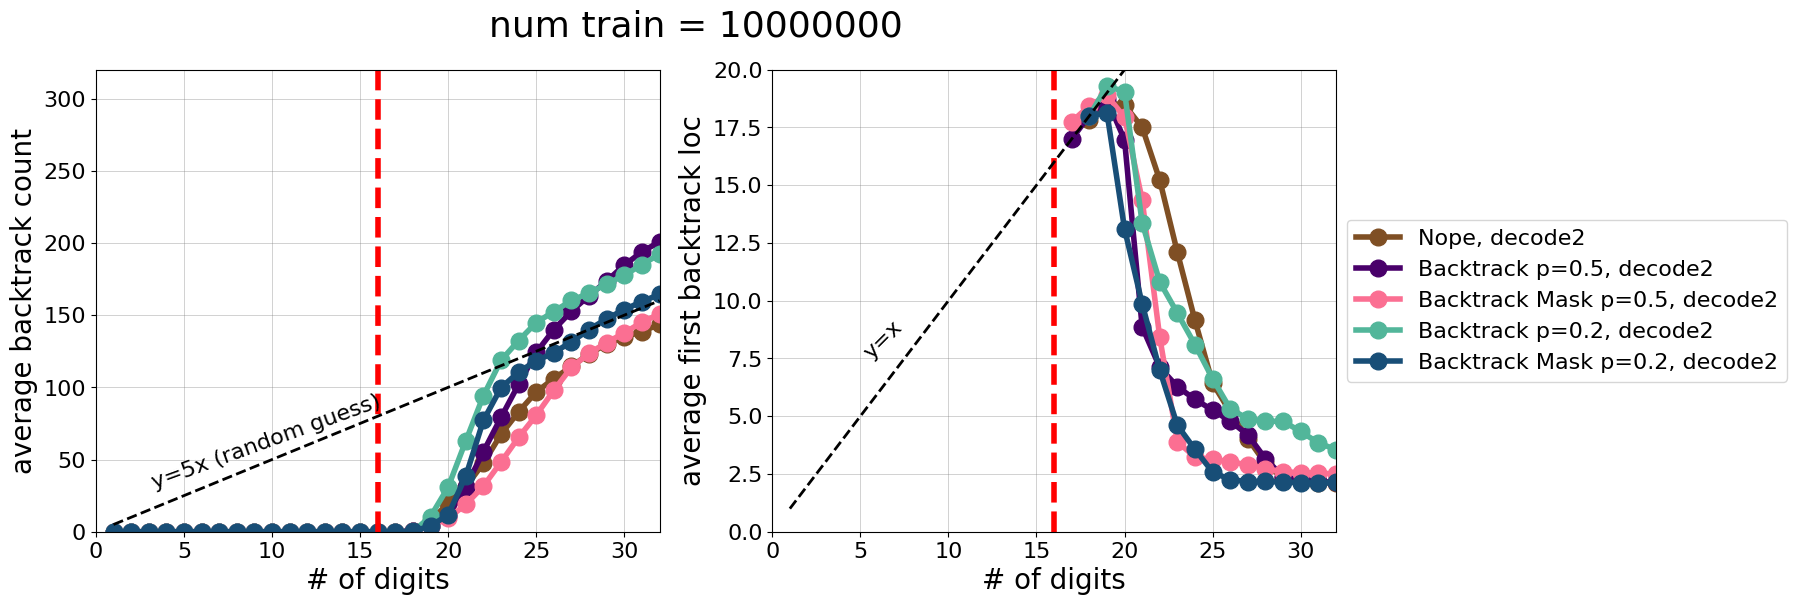

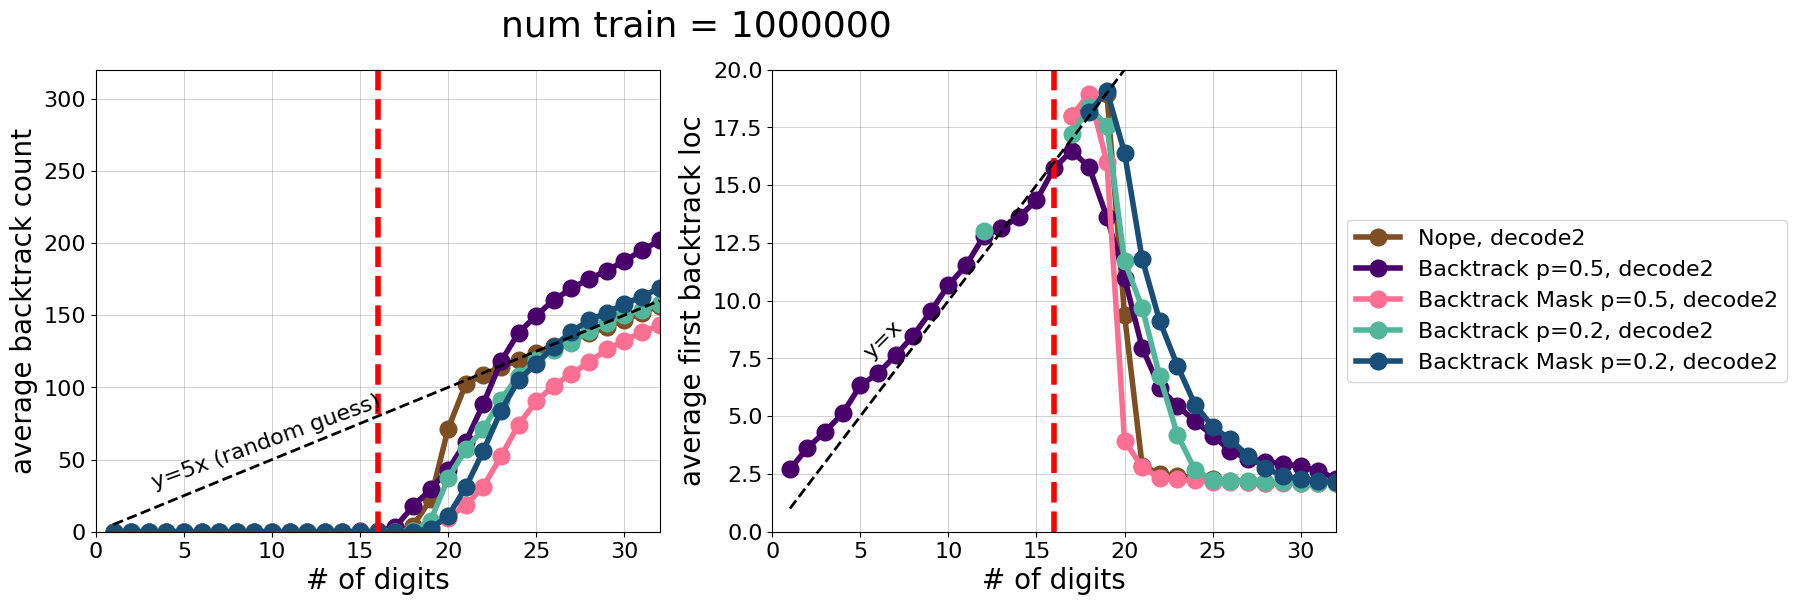

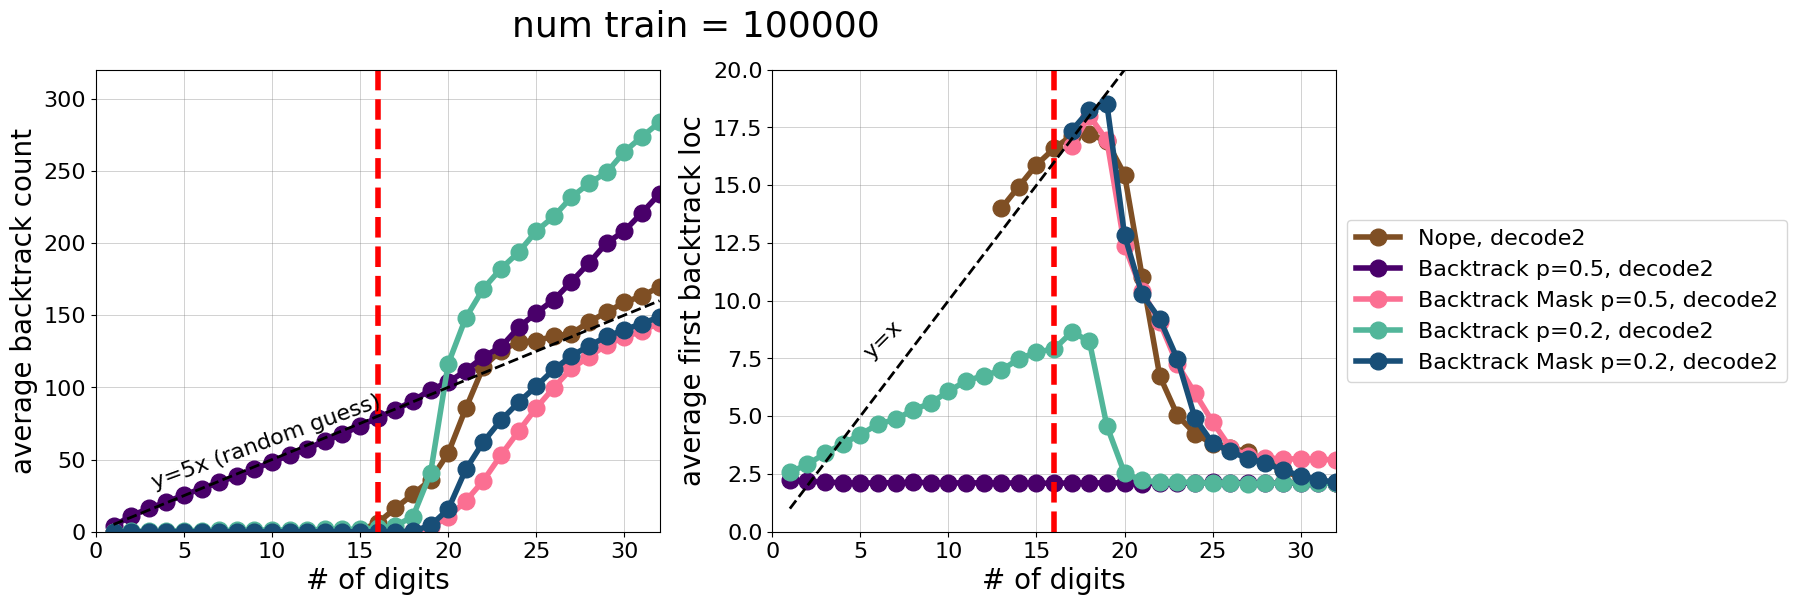

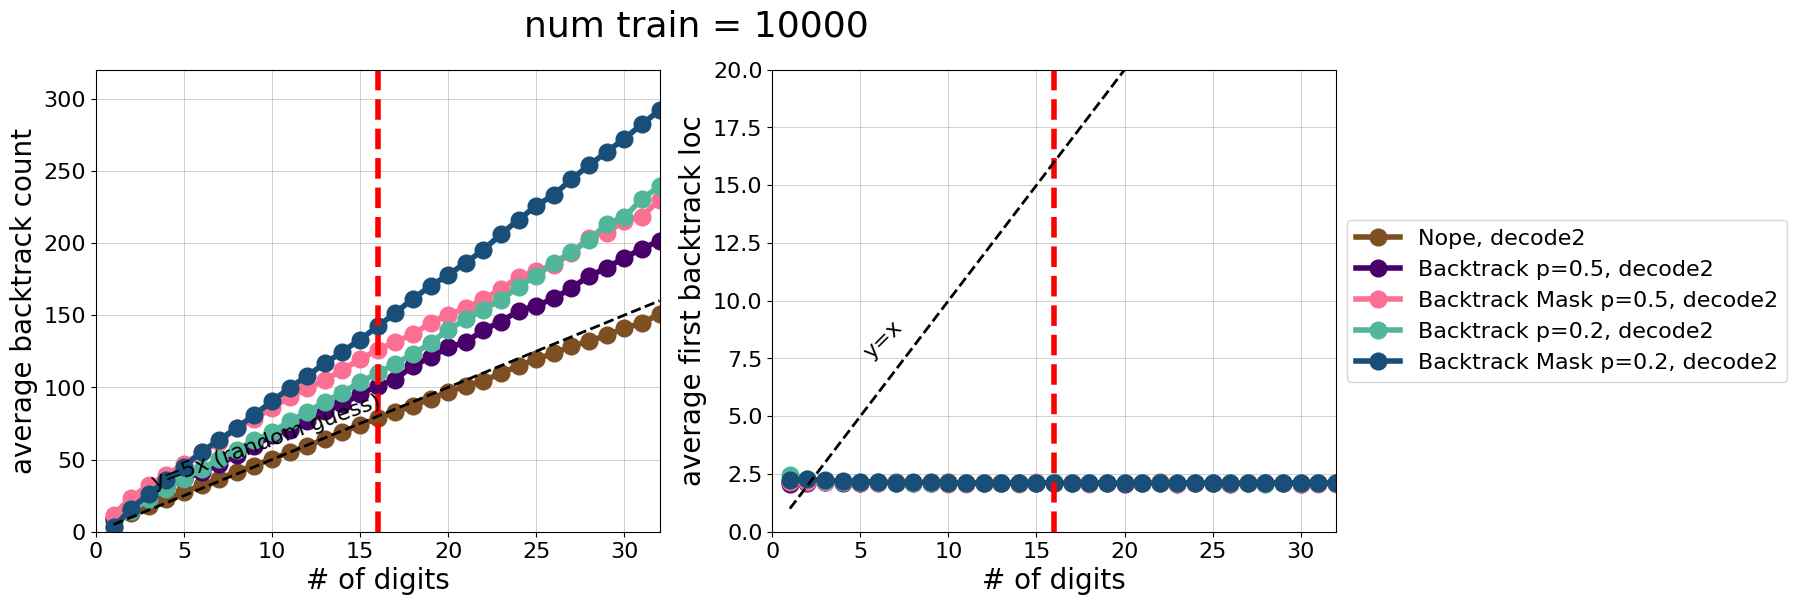

In [16]:
plot_length_gen_metric(num_train=10000000)
plot_length_gen_metric(num_train=1000000)
plot_length_gen_metric(num_train=100000)
plot_length_gen_metric(num_train=10000)

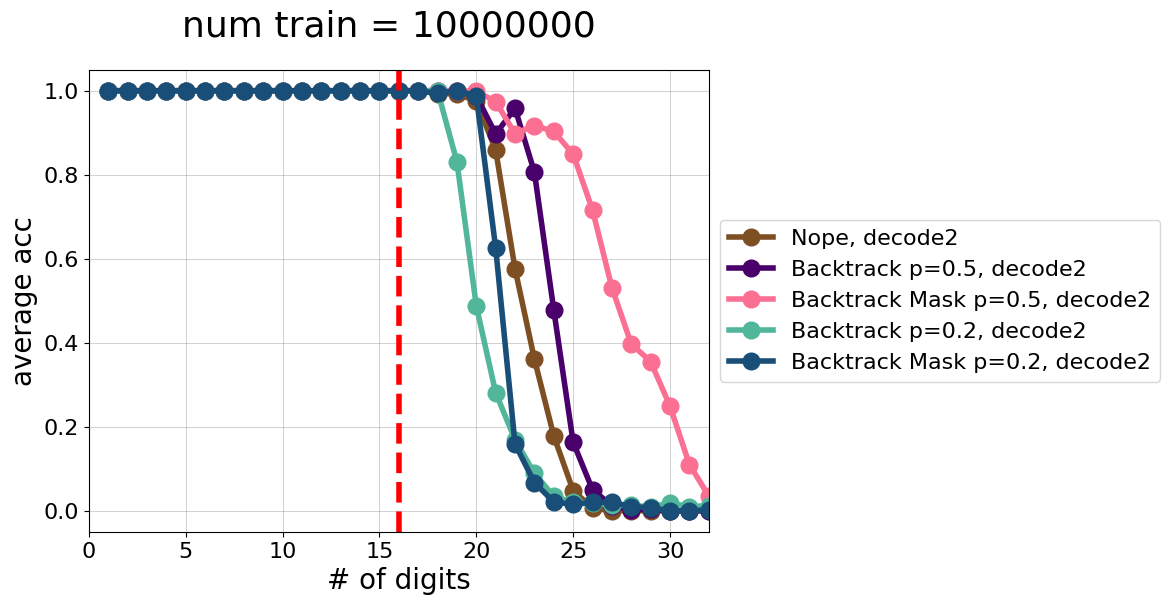

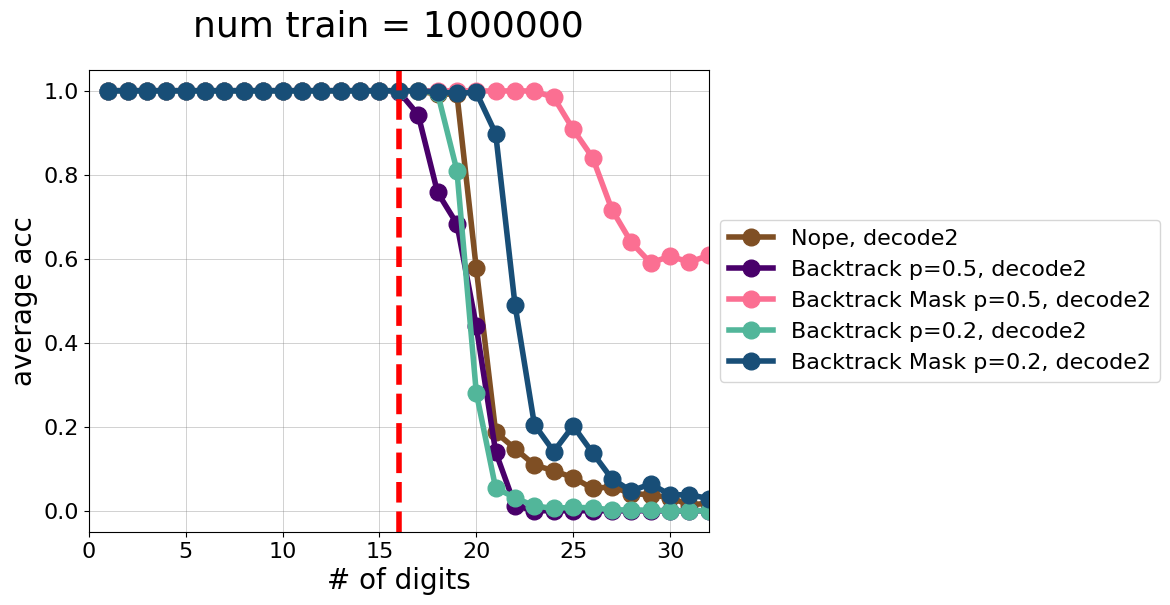

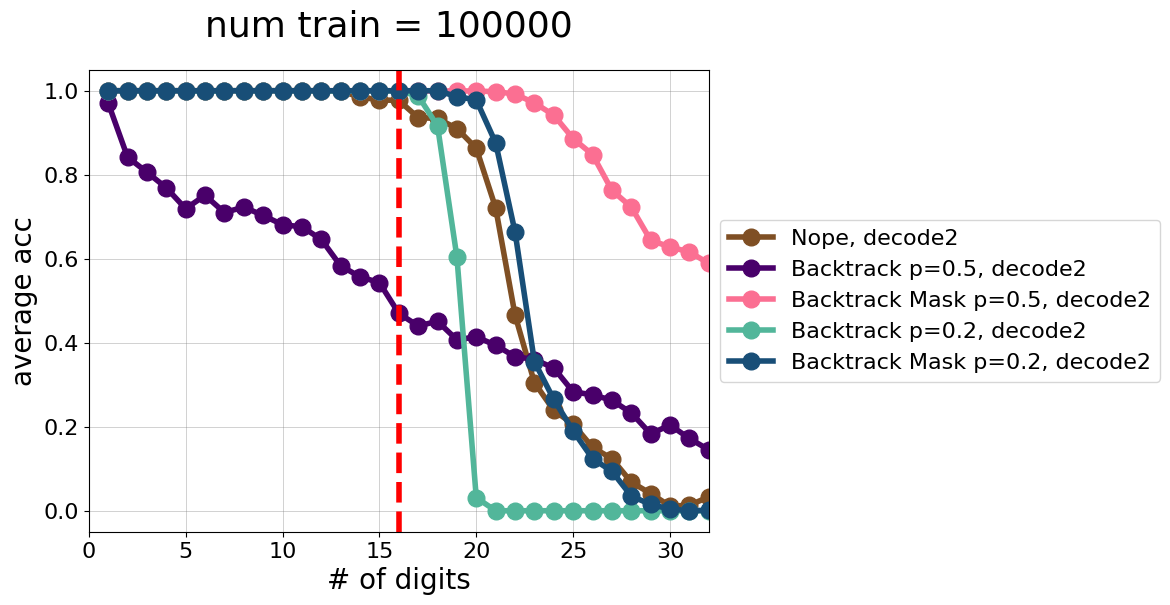

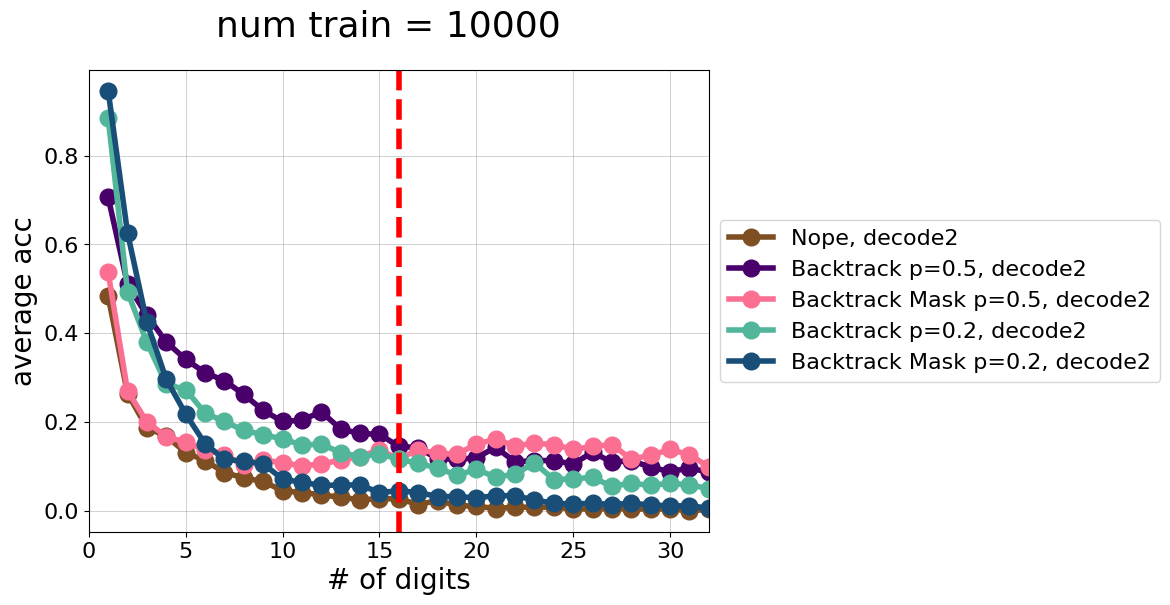

In [21]:
metrics = ['acc']
plot_length_gen_metric(num_train=10000000, metrics=metrics)
plot_length_gen_metric(num_train=1000000, metrics=metrics)
plot_length_gen_metric(num_train=100000, metrics=metrics)
plot_length_gen_metric(num_train=10000, metrics=metrics)